In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn
from textwrap import wrap

In [2]:
df = pd.read_excel('/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/DLS_Plots/20231016_DLSData.xlsx')

In [5]:
polymer = df["Polymer"]
diameter = df['Effective Diameter Avg. (nm)']
stdev = df['Std']

In [6]:
# This will wrap text after 20 characters. You can adjust this number as needed.
wrapped_polymer = ['\n'.join(wrap(name, 20)) for name in polymer]

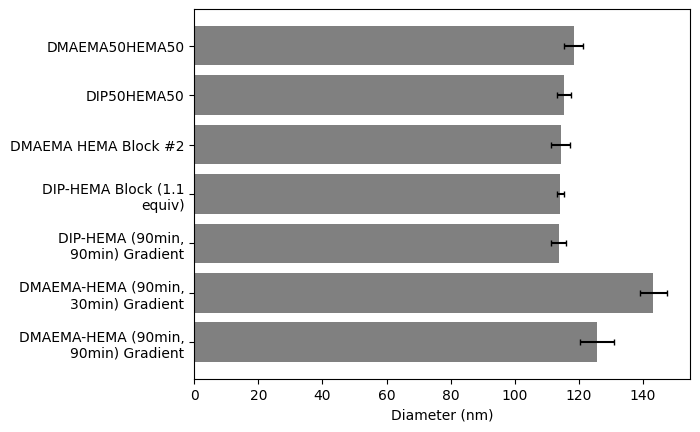

In [12]:
plt.barh(wrapped_polymer, diameter, xerr=stdev, capsize = 2, color='gray')
plt.xlabel('Diameter (nm)')
plt.show()